<a href="https://colab.research.google.com/github/SQUADRON-LEADER/Traveling-Salesman-Problem-TSP-Animation-using-AI/blob/main/Travelling_salesman_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00


Button(description='Play', style=ButtonStyle())

Button(description='Pause', style=ButtonStyle())

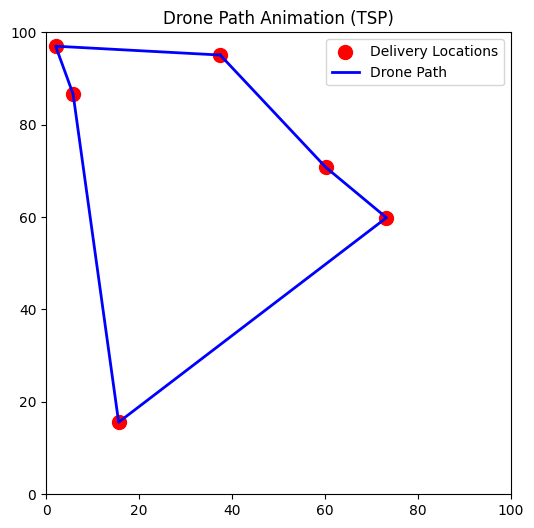

In [1]:
# Install required libraries
!pip install numpy matplotlib ipywidgets

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import permutations
from IPython.display import HTML, display
import ipywidgets as widgets

# Function to calculate total distance of a route
def total_distance(route, dist_matrix):
    return sum(dist_matrix[route[i], route[i+1]] for i in range(len(route)-1)) + dist_matrix[route[-1], route[0]]

# Brute-force TSP solution for small-scale problems
def solve_tsp_brute_force(dist_matrix):
    n = len(dist_matrix)
    cities = list(range(n))
    min_route = None
    min_cost = float('inf')

    for perm in permutations(cities[1:]):  # Fix first city to reduce redundancy
        route = (0,) + perm  # Start from city 0
        cost = total_distance(route, dist_matrix)
        if cost < min_cost:
            min_cost = cost
            min_route = route

    return min_route, min_cost

# Generate random delivery locations
num_cities = 6
np.random.seed(42)
locations = np.random.rand(num_cities, 2) * 100  # Random 2D coordinates

# Compute Euclidean distance matrix
dist_matrix = np.linalg.norm(locations[:, np.newaxis] - locations, axis=2)

# Solve TSP and get optimal route
optimal_route, min_cost = solve_tsp_brute_force(dist_matrix)

# Prepare figure and animation
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_title("Drone Path Animation (TSP)")

# Plot delivery locations
ax.scatter(locations[:, 0], locations[:, 1], c='red', s=100, label="Delivery Locations")
lines, = ax.plot([], [], 'b-', linewidth=2, label="Drone Path")

# Function to update animation
def update(frame):
    route = optimal_route[:frame+1] + (optimal_route[0],)  # Include return to start
    lines.set_data(locations[route, 0], locations[route, 1])
    return lines,

# Create the animation & store it in a variable to prevent garbage collection
ani = animation.FuncAnimation(fig, update, frames=len(optimal_route), interval=1000, repeat=True)

# Save animation as HTML5 video
video = ani.to_jshtml()

# Create Play/Pause buttons
play_button = widgets.Button(description="Play")
pause_button = widgets.Button(description="Pause")

def play_animation(b):
    display(HTML(video))  # Display the animation

def pause_animation(b):
    print("Pause function is not supported in Google Colab.")

play_button.on_click(play_animation)
pause_button.on_click(pause_animation)

# Display Play/Pause buttons
display(play_button, pause_button)
plt.legend()
plt.show()
